In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.metrics.pairwise import linear_kernel
import tokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

###get data 

In [8]:
df = pd.read_csv('data/all_sftweets')

In [9]:
df.head()

,Unnamed: 0,timestamp_ms,text,geoid10
0,2,1438848499256,test,60750201001001
1,3,1438545172798,https t co scRjn8RVmU Office prank,60759804011003
2,5,1438545201596,http t co cKc8Zyxu0u,60759804011003
3,9,1438545222598,fromwhereistand pink summer summerstyle https...,60750178022012
4,12,1438545229992,http t co MiU0thFTDj,60750180002032


###group data by geoid. 

In [10]:
#get a dataframe of all the tweet text for every region over every day
geo_doc_fg = df.groupby('geoid10')['text'].apply(lambda x: ' '.join(x)).reset_index()

In [11]:
geo_docs = geo_doc_fg.text.tolist()

In [12]:
len(geo_docs)

1185

In [13]:
len(geo_docs[5])

6165

##WordCloud Mapping 

In [14]:
stop_words = stopwords.words('english')
stop_words.extend(['http', 'https', 'co', 'com', 'edu'])

def tokenize_string(text_string):
    '''Uses special tokenizer made for tweets. removes stop words too. Returns a list of tokens'''
    tokens = tokenizer.simpleTokenize(text_string)
    return [word for word in tokens if word not in stop_words]
    

In [15]:
token_doc = [tokenize_string(tweet) for tweet in geo_docs]

now you have a list of lists. Each sublist is a bunch of words! Now run these through a word cloud.

In [16]:
def plot_wordcloud(text_string, image_file = None, stopwords = {'http','https', 'co', 't', 'a', 'the', 'of', 'in', 'to', 'at'}, backgroundcolor = 'white'):
    '''Takes a string of Text. Using the wordcloud library, produces a word cloud image.
    If an image file is given, saves the image to the file. Otherwise, returns a plot of the wordcloud'''
    wordcloud = WordCloud(background_color = 'white', stopwords = stopwords).generate(text_string)
    if image_file:
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.savefig(image_file, dpi=200)
    else: 
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
        
    # Open a plot of the generated image.

max() arg is an empty sequence


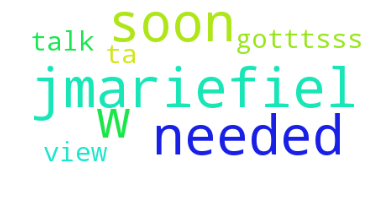

In [18]:
#for index in xrange(len(token_doc)):
for index in xrange(len(token_doc)):

    thisfile = 'tokenizeddata/wrdclouds/'+ str(index) + ".png"
    try:
        plot_wordcloud(' '.join(token_doc[index]), image_file=thisfile)
    except Exception as e:
        print e


In [19]:
print 'done'

done


In [25]:
geo_doc_fg.to_csv('geo_key_cloud.csv')

In [26]:
ls

data/                      token_testing.ipynb
geo_key_cloud.csv          tokenizeddata/
processes_df.py            tokenizer.py
sql_tweet_process.ipynb*   tokenizer.pyc
sql_tweet_process.py       twitter_data_to_sql.ipynb*
tessstttyyy.png            twitter_data_to_sql.py


##First Analysis: 
###Get a TFIDF for every geographical region

In [46]:
vectorizer = TfidfVectorizer(max_features=n_features, stop_words='english', strip_accents='unicode')

In [50]:
tfidf_vectorized = vectorizer.fit_transform(geo_docs)

### Now we can measure which neighborhoods are similar

In [54]:
cosine_similarities = linear_kernel(tfidf_vectorized, tfidf_vectorized)

In [56]:
cosine_similarities.shape

(1185, 1185)

In [57]:
cosine_similarities[0]

array([ 1.        ,  0.71555602,  0.46584639, ...,  0.11265556,
        0.20890518,  0.02482743])

###Now I have a matrix with word frequency as the features and each document is a region.

In [65]:

tfidf_sf_geo = tfidf_vectorized.todense()

In [66]:
tfidf_sf_geo

matrix([[ 0.02006645,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])